<a href="https://colab.research.google.com/github/JakrapunS/BERTopic-Thai/blob/main/BERTopic_Thai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Data

In [1]:
import pandas as pd
from random import sample

In [89]:
from wordcloud import WordCloud

In [3]:
!wget https://publicapi.traffy.in.th/share/teamchadchart/download

--2022-06-11 22:30:08--  https://publicapi.traffy.in.th/share/teamchadchart/download
Resolving publicapi.traffy.in.th (publicapi.traffy.in.th)... 35.201.64.130
Connecting to publicapi.traffy.in.th (publicapi.traffy.in.th)|35.201.64.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘download’

download                [     <=>            ] 865.30K   964KB/s    in 0.9s    

2022-06-11 22:30:13 (964 KB/s) - ‘download’ saved [886070]



In [4]:
df = pd.read_csv('download')
df.head()

,type,organization,comment,coords,photo,address,district,subdistrict,province,timestamp
0,เสนอแนะ,เพื่อนชัชชาติ,อยากให้ประสานกับแฟตลตำรวจในซอยลือชาให้จัดสร้าง...,"[100.538558,13.772258]",https://storage.googleapis.com/traffy_public_b...,62/435 ถ. พหลโยธิน แขวง สามเสนใน เขตพญาไท กรุง...,พญาไท,สามเสนใน,กรุงเทพมหานคร,2022-06-11 22:15:37.621657+00
1,อื่นๆ,เพื่อนชัชชาติ,สวัสดีครับ พื้นที่ตรงซอยเอกชัย 36 หน้าปากซอย ไ...,"[100.445505,13.685424]",https://storage.googleapis.com/traffy_public_b...,161/285 ซอย กำนันแม้น 2 แขวงบางขุนเทียน เขตจอม...,จอมทอง,บางขุนเทียน,กรุงเทพมหานคร,2022-06-11 22:10:50.963466+00
2,อื่นๆ,เพื่อนชัชชาติ,เลี้ยงแมวแต่ไม่ดูเเลทำมห้เพื่อนบ้านเกิดความเดื...,"[100.561437329624,13.7710859759575]",https://storage.googleapis.com/traffy_public_b...,1422/33 ถนน ประชาสงเคราะห์ แขวง ดินแดง เขตดินแ...,ดินแดง,ดินแดง,กรุงเทพมหานคร,2022-06-11 22:06:15.486032+00
3,จราจร,เพื่อนชัชชาติ,ซอยมิตรไมตรี 14 หนองจอก มีหญ้าและต้นไม้ขึ้นรกข...,"[100.817082,13.859496]",https://storage.googleapis.com/traffy_public_b...,15/3 ซอย มิตรไมตรี 14 แขวง คู้ฝั่งเหนือ เขต หน...,หนองจอก,คู้ฝั่งเหนือ,กรุงเทพมหานคร,2022-06-11 22:03:44.634708+00
4,อื่นๆ,เพื่อนชัชชาติ,มีประเภทใดบ้างคะ พอดีไม่เคยแจ้งค่ะ,"[100.561437329624,13.7710859759575]",https://storage.googleapis.com/traffy_public_b...,1422/33 ถนน ประชาสงเคราะห์ แขวง ดินแดง เขตดินแ...,ดินแดง,ดินแดง,กรุงเทพมหานคร,2022-06-11 22:02:38.653309+00


In [5]:
doc = df['comment'].str.strip().tolist()

# BERTopic

In [6]:
!pip install pynndescent==0.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 3.9 MB/s 
  Created wheel for pynndescent: filename=pynndescent-0.5.0-py3-none-any.whl size=49000 sha256=c9fb66901e0cb9dc33e2402051105439fa16dedeea6f0d1c015f8286795e53da
  Stored in directory: /root/.cache/pip/wheels/a5/69/1b/4f452904877ffec179c32e84122e700e14d4d06f1316e55b41
Successfully built pynndescent


In [7]:
%%capture
!pip install bertopic

In [8]:
from bertopic import BERTopic

In [120]:
topic_model = BERTopic(language="multilingual", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(doc)

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

2022-06-11 23:06:48,775 - BERTopic - Transformed documents to Embeddings
2022-06-11 23:06:56,909 - BERTopic - Reduced dimensionality
2022-06-11 23:06:57,005 - BERTopic - Clustered reduced embeddings


In [121]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name
0,-1,262,-1_าท_าหน_นท_ไม
1,0,123,0_ทำให_ดข_ไม_เป
2,1,70,1_นเหม_งกล_กล_กว
3,2,67,2_https_ตร_goo_gl
4,3,49,3_ำท_วมข_ญหาน_าฯ


In [122]:
topic_model.visualize_topics()

In [123]:
topic_model.visualize_barchart(top_n_topics=10)

In [126]:
topic_model.visualize_heatmap(n_clusters=23, width=1000, height=1000)

In [127]:
new_topics, new_probs = topic_model.reduce_topics(doc, topics, probs, nr_topics=5)

2022-06-11 23:07:30,101 - BERTopic - Reduced number of topics from 25 to 6


In [128]:
temp= [doc,new_topics]

In [129]:
df_result = pd.DataFrame(temp).transpose()
df_result.columns = ['comment', 'topic']

In [130]:
df_result['topic'].unique()

array([0, -1, 3, 1, 4, 2], dtype=object)

In [116]:
df_result[df_result['topic'] ==0].reset_index()

,index,comment,topic
0,0,อยากให้ประสานกับแฟตลตำรวจในซอยลือชาให้จัดสร้าง...,0
1,5,1.ถนนพังจากการก่อสร้างรถไฟฟ้า อันตรายต่อผู้ใช้...,0
2,12,ป้ายรถเมล์หน้าฮอนด้า พระราม4 \nนอกจากรถขสมก.สา...,0
3,16,ร้านค้าแถวโลตัสประชาชื่น \nเปิดเพลงเสียงดัง ช่...,0
4,19,ป้ายบริษัทยื่นออกมาในเขตทางเท้าและสภาพเก่าจะหล...,0
...,...,...,...
208,960,มีการติดที่สแลนในพื้นที่ถนนซึ่งเป็นทางสาธารณะ,0
209,963,ถนน,0
210,983,ออกจากทางด่วนแล้วออกไม่ได้เพราะติดรถที่จอดอยู่...,0
211,990,ขยายผิวการจราจรเป็น2ช่อง ร่วมมือกับทางหลวง กทม...,0


# Visualisation

In [48]:
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 4.6 MB/s 


In [49]:
from pythainlp import word_tokenize

In [50]:
import pythainlp
th_stopword = pythainlp.corpus.common.thai_stopwords()

In [131]:
result={}
for t in [0, -1, 2, 4, 1, 3]:
  token_list=[]
  for i,row in df_result[df_result['topic'] ==t].reset_index().iterrows():
    token = word_tokenize(row['comment'])
    token_list.append([item for item in token if item not in th_stopword])
  result[t] = token_list

In [75]:
result[3][0]

['น้ำ', 'ขัง', 'น้ำเสีย', '.', 'ระบาย', ' ', 'ยุงลาย']

In [54]:
import re
#Regex not Thai
pattern = re.compile("[^\u0E00-\u0E7F]")

In [132]:
#Remove non Thai and space
result_clean={}
for t in [0, -1, 2, 4, 1, 3]:
  Clean_token=[]
  for j in result[t]:
    temp=[]
    for i in j:
      temp.append(re.sub(pattern," ",i))
    Clean_token.append([item for item in temp if item not in [" ","  ","   ","    ","     ","      ","       "]])
  result_clean[t] = Clean_token

In [98]:
result_clean[1][0]

['ล้าง', 'ขี้นก', 'บริเวณ', 'ฟุตบาท', 'ปี', 'สกปรก', 'เชื้อโรค']

In [133]:
result_count={}
for t in [0,-1, 2, 4, 1, 3]:
  word_dict = {}
  for sentence in result_clean[t]:
    for word in sentence:
      if word in word_dict:
        word_dict[word] = word_dict[word]+1
      else:
        word_dict[word] = 1
  result_count[t] = word_dict

In [134]:
result_count_sorted={}
for t in [0, -1, 2, 4, 1, 3]:
  word_dict = result_count[t]
  result_count_sorted[t] = dict(sorted(word_dict.items(), key=lambda item: item[1],reverse=True))

In [135]:
df_dict={}
for t in [0, -1, 2, 4, 1, 3]:
  sorted_dict = result_count_sorted[t]
  df_dict[t] = pd.DataFrame(sorted_dict.items(), columns=['word', 'count'])

In [136]:
import matplotlib.pyplot as plt

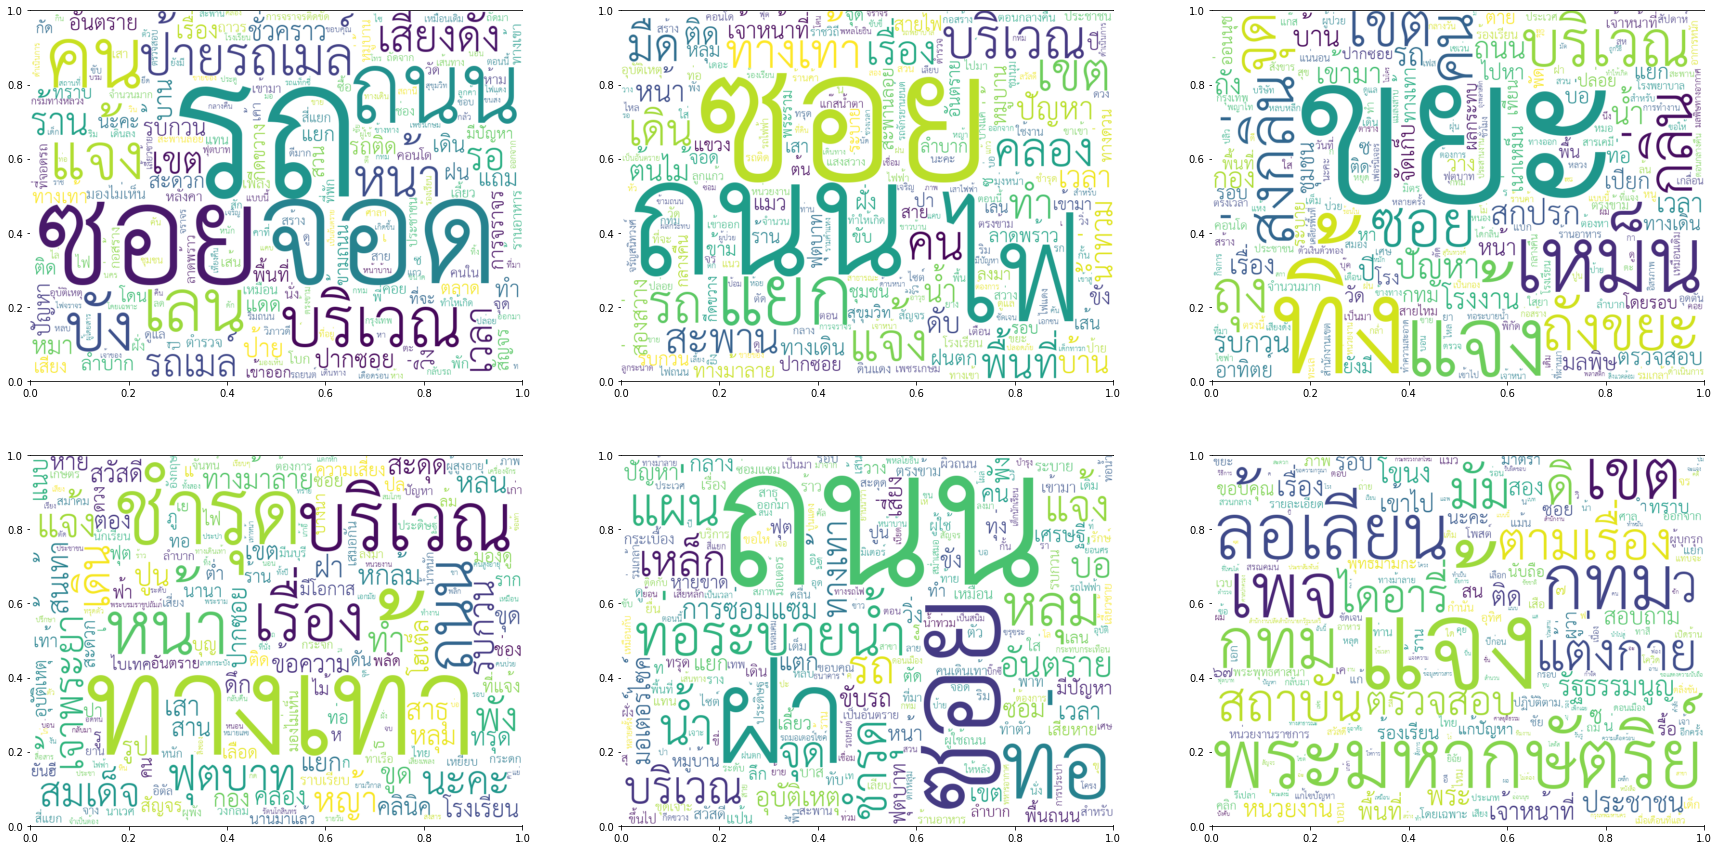

In [154]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))
i=0
for t in [0, -1, 2, 4, 1, 3]:
  
  d = {}
  for a, x in df_dict[t].values:
      d[a] = x
  #print(i)
  ax = fig.add_subplot(2,3,i+1)
  wordcloud = WordCloud(font_path='/content/THSarabunNew.ttf',
                        background_color="white",
                        width=1024, # กว้าง
                        height=768, # ยาว
                        collocations=False)
  wordcloud.generate_from_frequencies(frequencies=d)
  i=i+1
  ax.imshow(wordcloud, interpolation="bilinear")
  ax.axis('off')
  #plt.axis("off")
  

